# Statistical Arbitrage using Co-integration Technique

A favorite long-short strategy for most of the quantitative hedge funds

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import arch.unitroot as at
import statsmodels.api as sm

### List of ETFs (Risk Factor Based)
The comprehensive list of ETFs selected on the basis of risk based factors.These are put into cointegration test and the analysis can be seen below

In [2]:
list_of_etfs = ['VTHR','EEM','EFA','VLUE','TWOK','USMV','IGIL','TIP','CRED',
               'TLO', 'VNQ','CMDT', 'WYTE', 'DBV', 'EWA','EWC','EZA']
for etf in list_of_etfs:
    try:
        exec('{} = pd.DataFrame()'.format(etf))
        exec('{} = web.get_data_google("{}",start = "2014-1-1",end = "2017-1-1")'.format(etf,etf)) 
    except:
        print("Data not available for", etf)

Data not available for WYTE


In [3]:
VLUE.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-10,65.71,65.82,65.56,65.62,17934
2016-10-11,65.42,65.42,64.53,64.76,15472
2016-10-12,64.83,64.83,64.57,64.71,616686
2016-10-13,64.29,64.58,63.69,64.41,185095
2016-10-14,64.87,64.97,64.33,64.34,371233


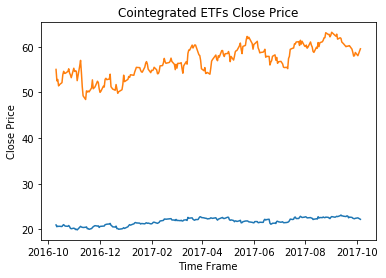

In [4]:
cointegrated_etfs_close_price = pd.DataFrame()
cointegrated_etfs_close_price['EWA'] = EWA['Close']
cointegrated_etfs_close_price['EZA'] = EZA['Close']
plt.plot(cointegrated_etfs_close_price)
plt.xlabel("Time Frame")
plt.ylabel("Close Price")
plt.title("Cointegrated ETFs Close Price")
plt.show()

In [5]:
print("The correlation between","EWA","and","EZA",cointegrated_etfs_close_price.loc[:,['EWA','EZA']].corr()['EWA']['EZA']*100,"%")

The correlation between EWA and EZA 80.8179107464 %


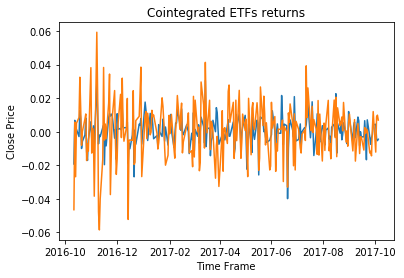

In [6]:
cointegrated_etfs = pd.DataFrame()
cointegrated_etfs['EWA'] = np.log(EWA['Close']/EWA['Close'].shift(1))
cointegrated_etfs['EZA'] = np.log(EZA['Close']/EZA['Close'].shift(1))
plt.plot(cointegrated_etfs)
plt.xlabel("Time Frame")
plt.ylabel("Close Price")
plt.title("Cointegrated ETFs returns")
plt.show()

In [7]:
print("The correlation between","EWA","and","EZA","returns is",cointegrated_etfs.loc[:,['EWA','EZA']].corr()['EWA']['EZA']*100,"%")

The correlation between EWA and EZA returns is 55.504776604 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9BC116240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A9BC778FD0>]], dtype=object)

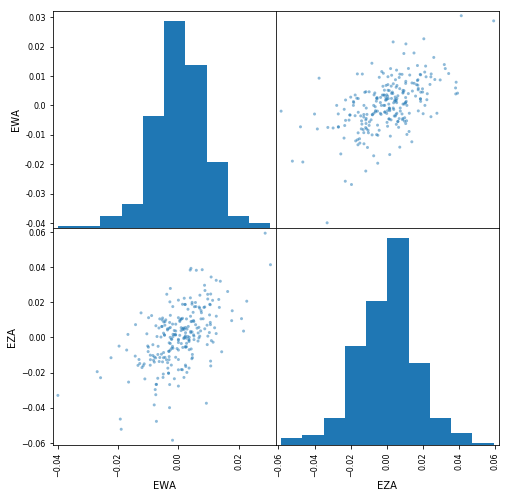

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(cointegrated_etfs,figsize = (8,8))

In [9]:
cointegrated_etfs_close_price = cointegrated_etfs_close_price.dropna()
ols_result = sm.OLS(cointegrated_etfs_close_price['EZA'],cointegrated_etfs_close_price['EWA']).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EZA   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.817e+05
Date:                Fri, 06 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:00:45   Log-Likelihood:                -540.96
No. Observations:                 250   AIC:                             1084.
Df Residuals:                     249   BIC:                             1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EWA            2.6157      0.006    426.320      0.000       2.604       2.628
==============================================================================
Omnibus:                        2.943   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.323
Skew:                           0.098   Prob(JB):                        0.313
Kurtosis:                       2.571   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Spread and mean spread between selected ETFs
### Engle Granger's Definition 
The following plot depicts spread between the two ETFs selected in this analysis. The orange line shows the mean of spread

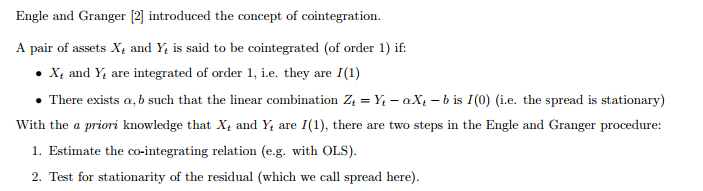

In [10]:
from IPython.display import Image
Image(filename='Spread.png') 

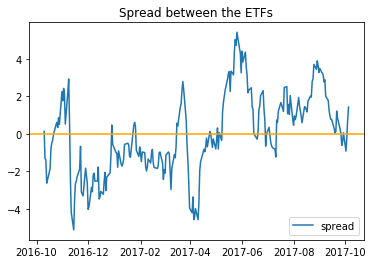

In [11]:
coeff = ols_result.params[0]
error = ols_result.bse
error = error.values[0]
cointegrated_etfs_close_price['spread'] = cointegrated_etfs_close_price['EZA'] - coeff*cointegrated_etfs_close_price['EWA'] - error
plt.plot(cointegrated_etfs_close_price['spread'])
plt.axhline(cointegrated_etfs_close_price['spread'].mean(),color='orange')
plt.legend(loc='lower right')
plt.title("Spread between the ETFs")
plt.show()

## Augmented Dickey Fuller Test 
This test will tell us that the time series is stationary to mean or not.

The null hypothesis is that a time series has unit root and is not stationary. 

If the p-value is more than 0.05, we can say that time series is non stationary with a confidence level of 95% and there is a unit root present

In [12]:
eemdf = at.ADF(cointegrated_etfs_close_price['EWA'])
print("EEM prices Augmented Dickey Fuller Stationary Test")
print("")
print(eemdf)
print("=================================================================================================")
print("=================================================================================================")
vluedf = at.ADF(cointegrated_etfs_close_price['EZA'].dropna())
print("VLUE prices Augmented Dickey Fuller Stationary Test")
print("")
print(vluedf)

EEM prices Augmented Dickey Fuller Stationary Test

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.915
P-value                         0.325
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
VLUE prices Augmented Dickey Fuller Stationary Test

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.077
P-value                         0.254
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### Conclusion of above test for price trend of ETFs

The results from above augmented dickey fuller test is that the process which defines the price trend of these ETFs, is stochastic in nature and we have to accept the null hypothesis according to the obtained p-values. This means it has a unit root present and the time series is non-stationary.

In [13]:
eemdiff = cointegrated_etfs_close_price['EWA']-cointegrated_etfs_close_price['EWA'].shift(1)
eemdf = at.ADF(eemdiff.dropna())
print("EEM price differences Augmented Dickey Fuller Stationary Test")
print("")
print(eemdf)
print("=================================================================================================")
print("=================================================================================================")
vluediff = cointegrated_etfs_close_price['EZA']-cointegrated_etfs_close_price['EZA'].shift(1)
vluedf = at.ADF(vluediff.dropna())
print("VLUE prices Augmented Dickey Fuller Stationary Test")
print("")
print(vluedf)

EEM price differences Augmented Dickey Fuller Stationary Test

   Augmented Dickey-Fuller Results   
Test Statistic                -12.475
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
VLUE prices Augmented Dickey Fuller Stationary Test

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.420
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### Conclusion of above test for difference in prices of ETFs
This suggests that one way to deal with stochastic trends (unit root) is by taking the first difference of variable. Here we obtained the p value of 0 which means we can reject the null hypothesis. Hence it is stationary process.

## Cointegration Test using Augemented Dickey Fuller Test 

In [14]:
spreaddf = at.ADF(cointegrated_etfs_close_price['spread'].dropna())
print("ETF prices Augmented Dickey Fuller Cointegration Test")
print("")
print(spreaddf)

ETF prices Augmented Dickey Fuller Cointegration Test

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.214
P-value                         0.019
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [15]:
spreaddf.pvalue

0.019203815984100803

### Conclusion of above test and interpretation of Cointegration confidence
iShares MSCI South Africa ETF (EZA is dependent) and iShares MSCI Australia ETF (EWA is independent)

Here we can't say that the spread between the selected ETFs is stationary with 95% confidence level and hence are strongly cointegrated

### Creating a portfolio using three pairs of strongly cointegrated ETFs

Johansen test using the code on https://searchcode.com/codesearch/view/88477497/

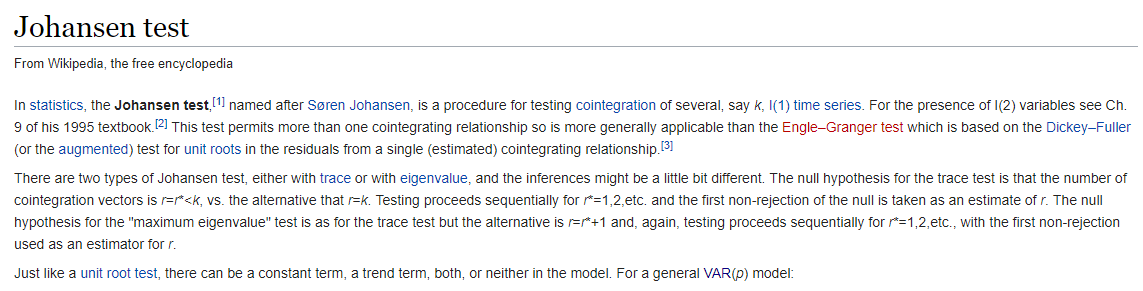

In [17]:
import os
os.chdir("C:/Users/garvi/Desktop/Robo Advisor/Statistical Arbitrage")
Image(filename='johansen.png')

In [18]:
os.chdir("C:/Users/garvi/Anaconda3_new/Lib/site-packages/johansen")
from johansen import coint_johansen
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import arch.unitroot as at
import statsmodels.api as sm
import ipywidgets as widgets
# All vanguard's issued ETFs trading currently
list_of_etfs = ['VTI','VBK','VOO','VPU','BND','BSV']
for etf in list_of_etfs:
    try:
        exec('{} = pd.DataFrame()'.format(etf))
        exec('{} = web.get_data_google("{}")'.format(etf,etf)) 
    except:
        pass
        
list_of_dfs = [VTI,VBK,VOO,VPU,BND,BSV]
dataframe_etfs_close_price = pd.DataFrame(columns=list_of_etfs)
i = 0
for df in list_of_dfs:
    try:
        dataframe_etfs_close_price[dataframe_etfs_close_price.columns[i]] = df['Close']
    except:
        pass
    i = i+1
dataframe_etfs_close_price.head()    

,VTI,VBK,VOO,VPU,BND,BSV
Date,,,,,,
2016-10-10,111.14,131.21,198.37,103.88,83.42,80.50
2016-10-11,109.66,128.77,195.96,102.59,83.29,80.47
2016-10-12,109.79,128.70,196.21,103.54,83.34,80.49
2016-10-13,109.40,127.96,195.58,104.79,83.44,80.54
2016-10-14,109.37,127.45,195.63,104.35,83.27,80.48


In [19]:
coint_johansen (dataframe_etfs_close_price,0,1)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 127.3294 91.109 95.7542 104.9637
r = 1 	 76.4024 65.8202 69.8189 77.8202
r = 2 	 43.5446 44.4929 47.8545 54.6815
r = 3 	 18.8589 27.0669 29.7961 35.4628
r = 4 	 6.9697 13.4294 15.4943 19.9349
r = 5 	 0.2164 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 50.927 37.2786 40.0763 45.8662
r = 1 	 32.8579 31.2379 33.8777 39.3693
r = 2 	 24.6857 25.1236 27.5858 32.7172
r = 3 	 11.8892 18.8928 21.1314 25.865
r = 4 	 6.7532 12.2971 14.2639 18.52
r = 5 	 0.2164 2.7055 3.8415 6.6349
--------------------------------------------------
eigenvectors:
 [[  7.57500321e+00  -1.77004462e+00  -2.55828786e+00   3.80913397e-01
   -6.75854590e-03  -1.83763058e-01]
 [ -7.64515740e-01   3.56854887e-01   1.35948935e+00   3.60903131e-02
    2.75237576e-01   6.69788153e-02]
 [ -3.79643294e

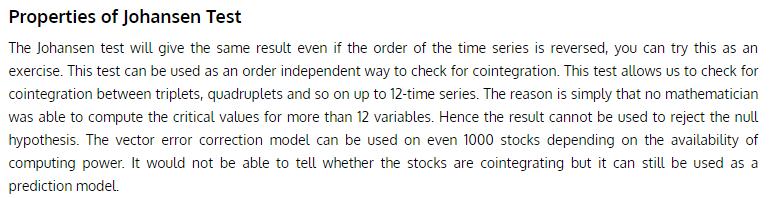

In [20]:
os.chdir("C:/Users/garvi/Desktop/Robo Advisor/Statistical Arbitrage")
Image(filename='johansen_prop.png')

### Conclusion of Johansen test

The trace statistics tell us whether the sum of the eigenvalues is 0. The null hypothesis, r=0 gives us a trace statistic of 125.3802, hence the null hypothesis can be rejected at more than a 95% confidence level, as the magnitude of the trace statistic is greater than the critical value, note that the Johansen test only gives the magnitude of the output, hence we need not worry about the signs. The eigen statistics stores the eigenvalues in decreasing order of magnitude, they tell us how strongly cointegrated the series are or how strong is the tendency to mean revert. In our example, the eigen statistic for the null hypothesis can be rejected at more than a 95% confidence level, because 50.524 is greater than 40.0763. The eigenvectors give us the equation of the mean-reverting linear combination of the time series. The eigenvector corresponding to the highest eigenvalue represents the portfolio which has the greatest mean-reverting property. The null hypothesis was that the time series are not cointegrated, hence when we reject the null hypothesis and accept the alternate hypothesis, we suggest that the series are cointegrated.

In [21]:
import itertools
comb_of_etfs_1 = ['VTI','VOO','VEA','VWO','BND','VNQ','VTV','VUG','VIG','BSV','VCSH','VEU']
comb_of_etfs_2 = ['VO','VB','VYM','VGK','VCIT','VGT','BIV','VBR','VV','VXUS','VT','BNDX']
comb_of_etfs_3 = ['VOE','VHT','VBK','VFH','VXF','VNQI','VOT','VPL','VMBS','VSS','VDE','VTIP']
comb_of_etfs_4 = ['VDC','VIS','MGK','VPU','BLV','VCR','VCLT','VAW','VGSH','MGV','VOOG','VTEB']
comb_of_etfs_5 = ['VONG','VOX','VGIT','MGC','VONV','VTWO','VWOB','VOOV','IVOO','VIOO','VONE','IVOG']
comb_of_etfs_6 = ['IVOV','EDV','VIGI','VYMI','VGLT','VTHR','VIOG','VIOV','VTWG','VTWV']

combination_1 = list(itertools.combinations(comb_of_etfs_1,6))
combination_2 = list(itertools.combinations(comb_of_etfs_2,6))
combination_3 = list(itertools.combinations(comb_of_etfs_3,6))
combination_4 = list(itertools.combinations(comb_of_etfs_4,6))
combination_5 = list(itertools.combinations(comb_of_etfs_5,6))
combination_6 = list(itertools.combinations(comb_of_etfs_6,6))

combination_1[750:755]

[('VEA', 'VWO', 'VNQ', 'VTV', 'VUG', 'BSV'),
 ('VEA', 'VWO', 'VNQ', 'VTV', 'VUG', 'VCSH'),
 ('VEA', 'VWO', 'VNQ', 'VTV', 'VUG', 'VEU'),
 ('VEA', 'VWO', 'VNQ', 'VTV', 'VIG', 'BSV'),
 ('VEA', 'VWO', 'VNQ', 'VTV', 'VIG', 'VCSH')]

In [22]:
combinations = len(combination_1) +len(combination_2) +len(combination_3) +len(combination_4) +len(combination_5) + len(combination_6)
print("I am looking at",combinations,"combinations of portfolios, each of which contains 6 ETFs")      

I am looking at 4830 combinations of portfolios, each of which contains 6 ETFs


### Returns dataframe for the portfolio containing strongly cointegrated ETFs 

In [23]:
cointegrated_portfolio = [VTI, VOO, VTV, VO,VUG, VIG]   # selected through Johansen Test
returns = pd.DataFrame(columns=list_of_etfs)
i=0 
for etf in cointegrated_portfolio:
    returns[returns.columns[i]] = np.log(etf['Close']/etf['Close'].shift(1))
    i = i+1
returns = returns.dropna()
returns.head()

,VTI,VBK,VOO,VPU,BND,BSV
Date,,,,,,
2016-10-11,-0.013406,-0.012223,-0.011904,-0.015391,-0.013133,-0.012466
2016-10-12,0.001185,0.001275,0.000697,0.001265,0.001629,0.004132
2016-10-13,-0.003559,-0.003216,-0.003375,-0.003959,-0.002444,-0.001335
2016-10-14,-0.000274,0.000256,0.000350,-0.001509,-0.000997,-0.000243
2016-10-17,-0.002838,-0.002969,-0.002567,-0.002785,-0.003908,-0.003042


### Correlation Matrix for ETFs returns in our Portfolio

In [24]:
returns.corr()

,VTI,VBK,VOO,VPU,BND,BSV
VTI,1.000000,0.973768,0.927209,0.942218,0.895388,0.884970
VBK,0.973768,1.000000,0.922169,0.923918,0.916588,0.891900
VOO,0.927209,0.922169,1.000000,0.871074,0.726249,0.834246
VPU,0.942218,0.923918,0.871074,1.000000,0.855205,0.856077
BND,0.895388,0.916588,0.726249,0.855205,1.000000,0.812686
BSV,0.884970,0.891900,0.834246,0.856077,0.812686,1.000000


### Covariance Matrix for ETFs returns in our portfolio

In [25]:
returns.cov()

,VTI,VBK,VOO,VPU,BND,BSV
VTI,0.000024,0.000022,0.000023,0.000026,0.000023,0.000020
VBK,0.000022,0.000022,0.000021,0.000024,0.000022,0.000019
VOO,0.000023,0.000021,0.000025,0.000024,0.000019,0.000019
VPU,0.000026,0.000024,0.000024,0.000031,0.000025,0.000021
BND,0.000023,0.000022,0.000019,0.000025,0.000027,0.000019
BSV,0.000020,0.000019,0.000019,0.000021,0.000019,0.000020


## Obtaining the Efficient Fronteir with random weights allocation

### Calculating the weights of ETFs in our portfolio 

In [26]:
np.random.seed(1000)
num_assets = len(cointegrated_portfolio)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.19890866,  0.03500037,  0.28920211,  0.14674659,  0.2655225 ,
        0.06461977])

In [27]:
round(sum(weights),1)

1.0

### Expected Portfolio Return

In [28]:
print("The expected annualized returns for the portfolio of cointegrated ETFs is",round(np.sum(weights*returns.mean())*250*100,4),"%")

The expected annualized returns for the portfolio of cointegrated ETFs is 16.3146 %


### Expected Portfolio Variance & Volatility

In [29]:
print("Expected Portfolio Variance is :- ")
print(np.dot(weights.T, np.dot(returns.cov()*250, weights)))
print("Expected Portfolio Volatility is :- ")
print(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))

Expected Portfolio Variance is :- 
0.00570691465509
Expected Portfolio Volatility is :- 
0.0755441238952


### Simulation Technique 
#### Seeking higher return will give us the set of weights which has comparatively higher returns
#### Less Risk Lesser Returns 
In this approach, I am using following steps:- 

1) Simulating 1000 sets of random weights generated with a constrain of sum(weights) = 1

2) Finding the set of weights with highest return

3) Looking at the volatility associated with it

In [30]:
np.random.seed(1000)
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []
for x in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_weights.append(weights)
    pfolio_returns.append(np.sum(weights*returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities 

(array([ 0.16314565,  0.15388488,  0.16124824, ...,  0.16299034,
         0.15574944,  0.16062607]),
 array([ 0.07554412,  0.07506677,  0.07232433, ...,  0.0771856 ,
         0.07246912,  0.07179715]))

### Comparative Analysis of weights for Maximum Returns and Minimum Volatility 

In [31]:
portfolio = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities,'Weight':pfolio_weights})
print("========================")
print("Maximum Return Analysis |")
print("========================")
print("The maximum expected returns that can be achieved is", portfolio.max()[0]*100,"%")
print("with an expected volatility of",portfolio.loc[portfolio['Return'] == portfolio.max()[0]]['Volatility'].iloc[0]*100,"%")
print("")
print("The following array of weights are suggested to use -")
print(portfolio.loc[portfolio['Return'] == portfolio.max()[0]]['Weight'].iloc[0])
print("=================================================================================")
print("")
print("")
print("")
print("============================")
print("Minimum Volatility Analysis |")
print("============================")
print("The minimum expected volatility that can be achieved is", portfolio.min()[1]*100,"%")
print("with an expected returns of",portfolio.loc[portfolio['Volatility'] == portfolio.min()[1]]['Return'].iloc[0]*100,"%")
print("")
print("The following array of weights are suggested to use -")
print(portfolio.loc[portfolio['Volatility'] == portfolio.min()[1]]['Weight'].iloc[0])
print("=================================================================================")

Maximum Return Analysis |
The maximum expected returns that can be achieved is 17.6221077909 %
with an expected volatility of 7.88491241405 %

The following array of weights are suggested to use -
[ 0.14506252  0.01102885  0.01432199  0.07234893  0.69824833  0.05898936]



Minimum Volatility Analysis |
The minimum expected volatility that can be achieved is 7.0635082115 %
with an expected returns of 15.3169001128 %

The following array of weights are suggested to use -
[ 0.04446253  0.12605905  0.25074994  0.00117604  0.07600852  0.50154392]


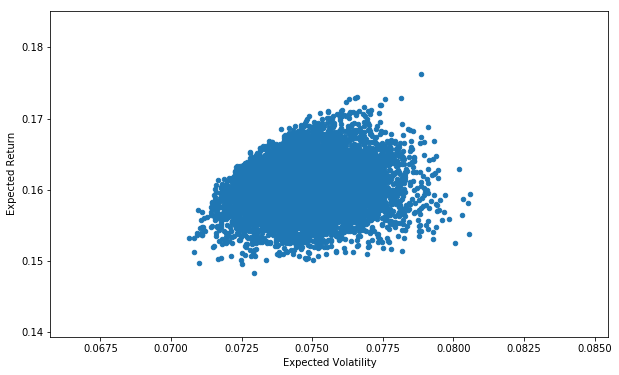

In [32]:
portfolio.plot(x='Volatility',y='Return', kind='scatter', figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")